# **Project Name**    - 



##### **Project Type**    -  Regression
##### **Contribution**    - Individual
##### **Team Member - Saurabh Sharma**

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Write Problem Statement Here.**

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [2]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date
from matplotlib.dates import DateFormatter
import seaborn as sns

### Dataset Loading

In [3]:
# Load Dataset
df = pd.read_csv('data_YesBank_StockPrices.csv')

### Dataset First View

In [4]:
# Dataset First Look
df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
df.shape

(185, 5)

### Dataset Information

In [6]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


#### Duplicate Values

In [7]:
# Dataset Duplicate Value Count
for i in df:
    print(i,':',df[i].count() - df[i].nunique())

Date : 0
Open : 2
High : 1
Low : 2
Close : 0


In [16]:
# We can se there are no null values in date , and open , high , low can have duplicate values by chance as they're prices
# of stock in particular month.

In [15]:
#converting datet column to date format
df['Date'] = pd.to_datetime(df['Date'], format='%b-%y')

In [16]:
# Print the starting and ending dates
print("Start Date:", min(df['Date']))
print("End Date:", max(df['Date']))

Start Date: 2005-07-01 00:00:00
End Date: 2020-11-01 00:00:00


### What did you know about your dataset?

Answer Here 

1 - The data is a list of Stock prices observations of YesBank. Each row represents closing price of YesBank Stock of that     month, and the columns contain information about the behaviour of that stock such as high price , low price ,open price     , closing price.
    

2 - There are 185 rows and 5 columns out of which 4 contains numerical data and 1 contains categorical.

3 - No Null values are present in any of the field.

4 - Date column doesn't have duplicates too , We got quite cleaned data.

5 - The Range of Date is in between Jul-05 to Nov-20.



## ***2. Understanding Your Variables***

In [9]:
# Dataset Columns
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

In [10]:
# Dataset Describe
df.describe(include= 'all')

,Date,Open,High,Low,Close
count,185,185.000000,185.000000,185.000000,185.000000
unique,185,NaN,NaN,NaN,NaN
top,Jul-05,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN
mean,NaN,105.541405,116.104324,94.947838,105.204703
std,NaN,98.879850,106.333497,91.219415,98.583153
min,NaN,10.000000,11.240000,5.550000,9.980000
25%,NaN,33.800000,36.140000,28.510000,33.450000
50%,NaN,62.980000,72.550000,58.000000,62.540000
75%,NaN,153.000000,169.190000,138.350000,153.300000


### Variables Description 

Date: the date of the observation

Open: the opening value of the stock price for the month

High: the highest value of the stock price for the month

Low: the lowest value of the stock price for the month

Close: the closing value of the stock price for the month

## 3. ***Data Wrangling***

### Data Wrangling Code

In [34]:
# Write your code to make your dataset analysis ready.
# creatig a copy
stock_df = df.copy()

# Convert the date column to datetime type
stock_df['Date'] = pd.to_datetime(stock_df['Date'], format='%b-%y')

stock_df

,Date,Open,High,Low,Close
0,2005-07-01,13.00,14.00,11.25,12.46
1,2005-08-01,12.58,14.88,12.55,13.42
2,2005-09-01,13.48,14.87,12.27,13.30
3,2005-10-01,13.20,14.47,12.40,12.99
4,2005-11-01,13.35,13.88,12.88,13.41
...,...,...,...,...,...
180,2020-07-01,25.60,28.30,11.10,11.95
181,2020-08-01,12.00,17.16,11.85,14.37
182,2020-09-01,14.30,15.34,12.75,13.15
183,2020-10-01,13.30,14.01,12.11,12.42


In [35]:
# Create a new column named "volatility" , It show how much fluctuations is in market in that month
stock_df["Volatility"] = stock_df["High"] - stock_df["Low"]

# Creating a new column, that shows how much stock price increased or dereased in a month
stock_df['Return'] = stock_df['Open'] - stock_df['Close']

#Creating new column , containing year and month
stock_df['Year'] = stock_df['Date'].dt.year
stock_df['Month'] = stock_df['Date'].dt.month

stock_df

,Date,Open,High,Low,Close,Volatility,Return,Year,Month
0,2005-07-01,13.00,14.00,11.25,12.46,2.75,0.54,2005,7
1,2005-08-01,12.58,14.88,12.55,13.42,2.33,-0.84,2005,8
2,2005-09-01,13.48,14.87,12.27,13.30,2.60,0.18,2005,9
3,2005-10-01,13.20,14.47,12.40,12.99,2.07,0.21,2005,10
4,2005-11-01,13.35,13.88,12.88,13.41,1.00,-0.06,2005,11
...,...,...,...,...,...,...,...,...,...
180,2020-07-01,25.60,28.30,11.10,11.95,17.20,13.65,2020,7
181,2020-08-01,12.00,17.16,11.85,14.37,5.31,-2.37,2020,8
182,2020-09-01,14.30,15.34,12.75,13.15,2.59,1.15,2020,9
183,2020-10-01,13.30,14.01,12.11,12.42,1.90,0.88,2020,10


### What all manipulations have you done and insights you found?

We converted 'Date' column to datetime object.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

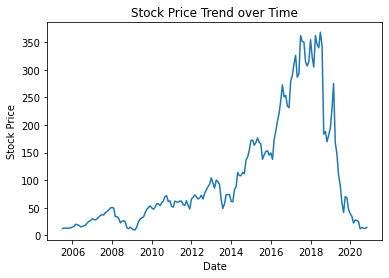

In [17]:
# Line chart
plt.plot(df['Date'], df['Close'])
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Stock Price Trend over Time')
plt.show()

##### 1. Why did you pick the specific chart?

I picked a line chart to visualize the trend of the stock price over time. This chart provides a clear and simple visual representation of the movement of the stock price, making it easy to identify trends and patterns.

##### 2. What is/are the insight(s) found from the chart?

From the chart, we can see that the stock price fluctuates over time, with some periods of growth and some periods of decline. This information can provide valuable insights into the stock's performance and help us make informed decisions about investments.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights gained from this chart can have a positive impact on business decisions. For example, the chart can help investors determine whether the stock is likely to rise or fall in the future, and make decisions about when to buy or sell the stock. Additionally, the chart can provide information about the overall health of the company, which can be useful in making investment decisions.

#### Chart - 2

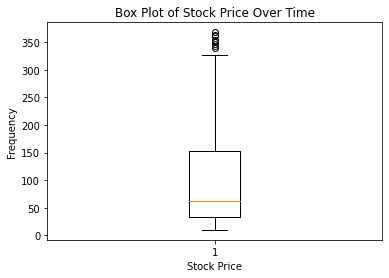

In [30]:
# Chart - 2 visualization code
import matplotlib.pyplot as plt

plt.boxplot(df['Close'])
plt.xlabel('Stock Price')
plt.ylabel('Frequency')
plt.title('Box Plot of Stock Price Over Time')
plt.show()


##### 1. Why did you pick the specific chart?

A box plot is a useful visual tool to see the distribution of the data, identify outliers, and see if there are any skewness in the data. In this case, we are using a box plot to visualize the distribution of the Close price of the stock over time.


##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

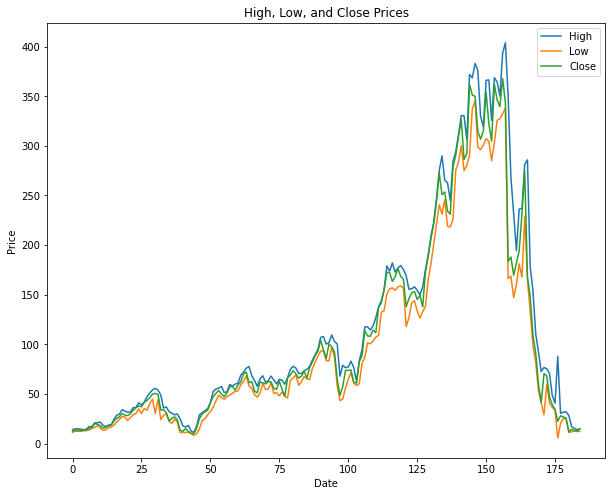

In [19]:
# Chart - 3 visualization code
plt.figure(figsize=(10, 8))

plt.plot(df['High'], label='High')
plt.plot(df['Low'], label='Low')
plt.plot(df['Close'], label='Close')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('High, Low, and Close Prices')
plt.legend()
plt.show()

##### 1. Why did you pick the specific chart?

I picked this chart because it provides a quick overview of the stock prices over a period of time. The line graph makes it easy to see the general trend of the prices, and it allows us to compare the High, Low, and Close prices against each other.

##### 2. What is/are the insight(s) found from the chart?

From the chart, we can see how the High, Low, and Close prices are related to each other, and how they change over time. By comparing the three lines, we can see whether the High price is generally higher than the Close price, for example.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The insights from the chart can be used to inform investment decisions, for example. By analyzing the trends in the High, Low, and Close prices, investors can make informed decisions about buying or selling stocks.

#### Chart - 4

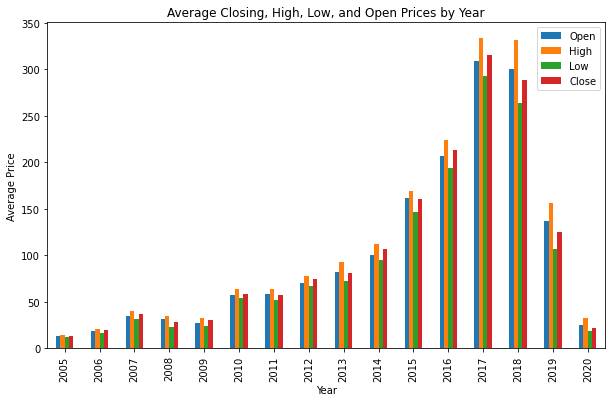

In [32]:
# Chart - 4 visualization code
# Group the data by year and calculate the average for each year for the closing, high, low, and open prices
grouped = stock_df.groupby('Year').mean()[['Open', 'High', 'Low', 'Close']]

# Plot the bar graph
grouped.plot(kind='bar', figsize=(10, 6))

# Set the x-axis label
plt.xlabel('Year')

# Set the y-axis label
plt.ylabel('Average Price')

# Set the title
plt.title('Average Closing, High, Low, and Open Prices by Year')

# Show the plot
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

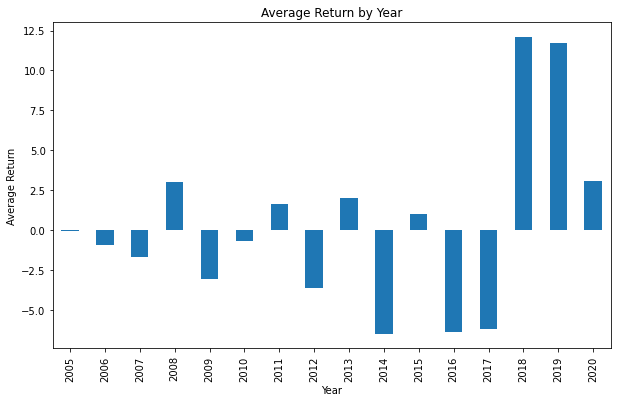

In [37]:
# Chart - 5 visualization code
# Group the data by year and calculate the average for each year for the
grouped = stock_df.groupby('Year').mean()['Return']

# Plot the bar graph
grouped.plot(kind='bar', figsize=(10, 6))

# Set the x-axis label
plt.xlabel('Year')

# Set the y-axis label
plt.ylabel('Average Return')

# Set the title
plt.title('Average Return by Year')

# Show the plot
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

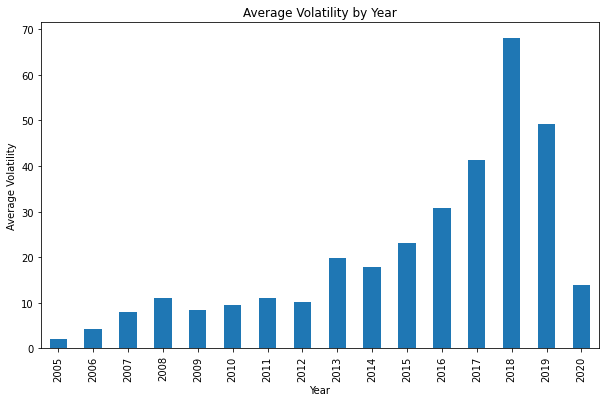

In [39]:
# Chart - 6 visualization code
# Group the data by year and calculate the average for each year for the
grouped = stock_df.groupby('Year').mean()['Volatility']

# Plot the bar graph
grouped.plot(kind='bar', figsize=(10, 6))

# Set the x-axis label
plt.xlabel('Year')

# Set the y-axis label
plt.ylabel('Average Volatility')

# Set the title
plt.title('Average Volatility by Year')

# Show the plot
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

In [ ]:
# Chart - 7 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [ ]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [ ]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [ ]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [ ]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [ ]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [ ]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot 

In [ ]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Hypothesis Statement 1: The average closing price of the stock has increased over the years.
Hypothesis Statement 2: The average opening price of the stock has a significant impact on the average closing price of the stock.
The average daily volatility (calculated as the difference between high and low prices) of the stock prices is not constant over time.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why? 

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***